In [119]:
from config import api_key
from googleapiclient.discovery import build
import pandas as pd
import json
import requests
import datetime
import numpy as np
from scipy.stats import linregress
from pprint import pprint
from matplotlib import pyplot as plt

In [81]:
df = pd.read_csv("US_youtube_trending_data.csv")
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [135]:
with open("US_category_id.json") as f: categoryID = json.load(f)
categoryID, l_c = categoryID['items'], len(categoryID['items'])
ID_to_Category = dict(zip([int(categoryID[i]['id']) for i in range(l_c)],
                          [categoryID[i]['snippet']['title'] for i in range(l_c)]))

In [83]:
category_list = []
for id_ in df.categoryId:
    category_list.append(ID_to_Category[id_])
category = pd.Series(category_list)
category
df["category"] = category

In [87]:
categories = df.category.value_counts()
categories

category
Entertainment            53934
Gaming                   53242
Music                    43398
Sports                   31327
People & Blogs           22653
Comedy                   13183
Film & Animation         10923
News & Politics           9669
Science & Technology      8156
Howto & Style             7100
Education                 6655
Autos & Vehicles          5492
Travel & Events           1713
Pets & Animals            1222
Nonprofits & Activism      120
Name: count, dtype: int64

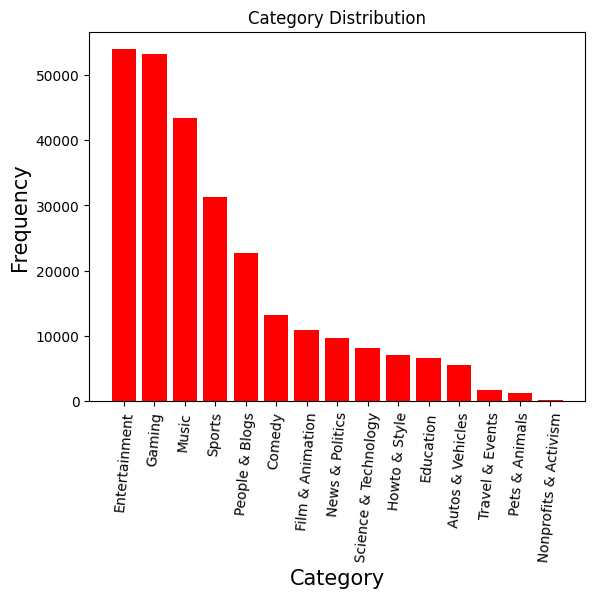

In [89]:
plt.bar(categories.index,categories.values,color = "red")
plt.xticks(rotation = 85)
plt.title("Category Distribution")
plt.xlabel("Category",size = 15)
plt.ylabel("Frequency",size = 15)
plt.show()

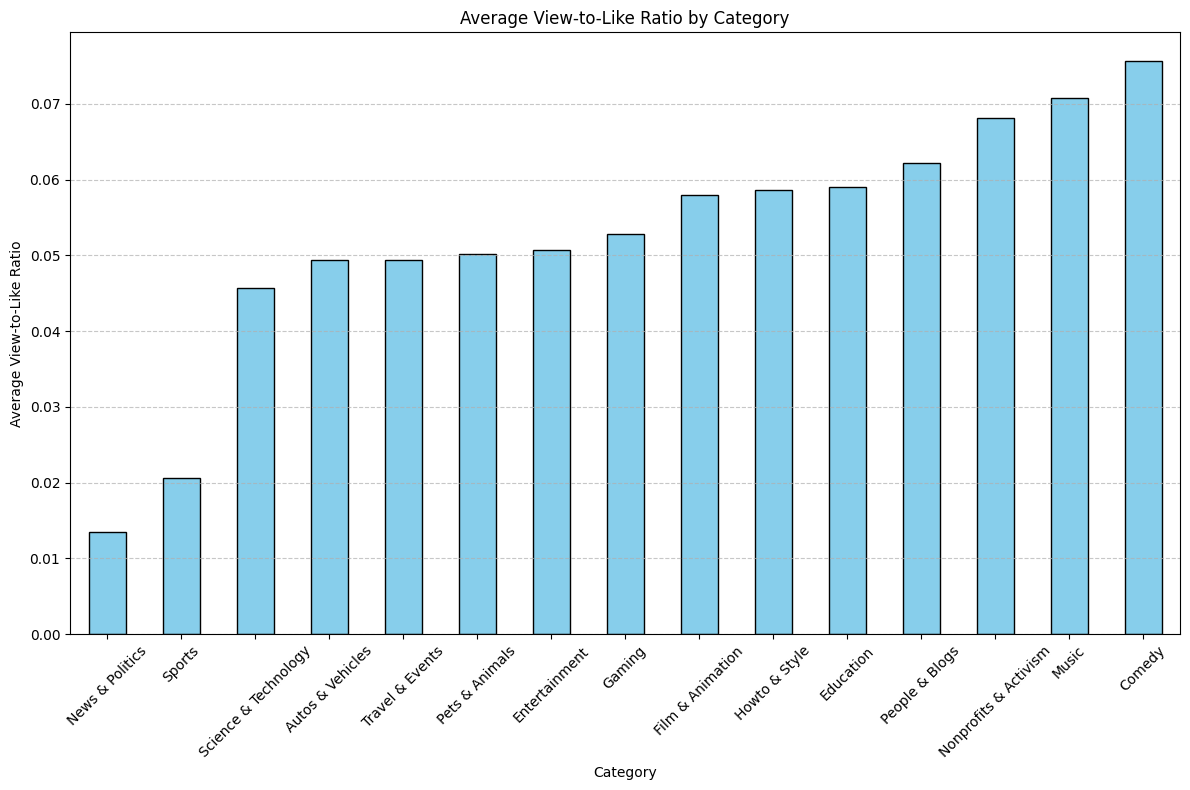

In [123]:
df['view_count'] = pd.to_numeric(df['view_count'])
df['likes'] = pd.to_numeric(df['likes'])

df = df.dropna(subset=['view_count', 'likes'])
df = df[(df['view_count'] > 0) & (df['likes'] > 0)]

df['view_to_like_ratio'] = df['likes'] / df['view_count']

category_ratios = df.groupby('category')['view_to_like_ratio'].mean().sort_values()

plt.figure(figsize=(12, 8))
category_ratios.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average View-to-Like Ratio by Category')
plt.xlabel('Category')
plt.ylabel('Average View-to-Like Ratio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Compute the linear regression line
#slope, intercept, r_value, p_value, std_err = linregress(entertainment_data['view_count'], entertainment_data['comment_count'])
#plt.plot(entertainment_data['view_count'], slope * entertainment_data['view_count'] + intercept, color='red', linestyle='--')
# Add labels and title

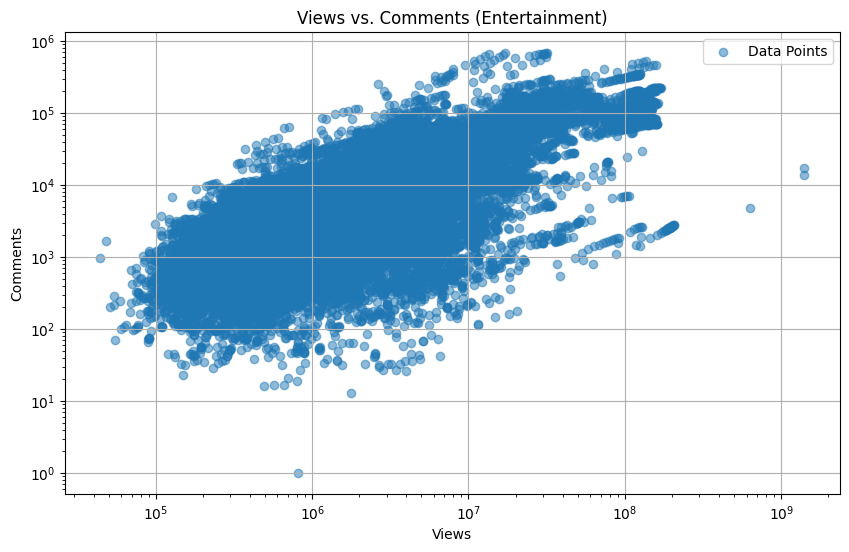

In [133]:
entertainment_data = df[df['category'] == 'Entertainment']
entertainment_data = entertainment_data.dropna(subset=['view_count', 'comment_count'])

entertainment_data['view_count'] = pd.to_numeric(entertainment_data['view_count'])
entertainment_data['comment_count'] = pd.to_numeric(entertainment_data['comment_count'])

plt.figure(figsize=(10, 6))
plt.scatter(entertainment_data['view_count'], entertainment_data['comment_count'], alpha=0.5, label='Data Points')

plt.title('Views vs. Comments (Entertainment)')
plt.xlabel('Views')
plt.ylabel('Comments')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

In [8]:
youtube = build('youtube','v3',developerKey=api_key)

In [9]:
request = youtube.videoCategories().list(
        part="snippet",
        regionCode="US")
response = request.execute()
pprint(response)

{'etag': 'QteLrrS_X7rM7rlcU_e7qa0embQ',
 'items': [{'etag': 'grPOPYEUUZN3ltuDUGEWlrTR90U',
            'id': '1',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Film & Animation'}},
           {'etag': 'Q0xgUf8BFM8rW3W0R9wNq809xyA',
            'id': '2',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Autos & Vehicles'}},
           {'etag': 'qnpwjh5QlWM5hrnZCvHisquztC4',
            'id': '10',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Music'}},
           {'etag': 'HyFIixS5BZaoBdkQdLzPdoXWipg',
            'id': '15',
            'kind': 'youtube#videoCategory',
 

In [10]:
category_number = []
categories = []
x = 0
for item in response["items"]:
    category_number.append(response["items"][x]["id"])
    categories.append(response["items"][x]["snippet"]["title"])
    x = x + 1
    

category_index = {}
for key in category_number:
    for value in categories:
        category_index[key] = value
        categories.remove(value)
        break
category_index.pop("18")
category_number.remove("18")
category_index.pop("19")
category_number.remove("19")
category_index.pop("21")
category_number.remove("21")
category_index.pop("27")
category_number.remove("27")
category_index.pop("30")
category_number.remove("30")
category_index.pop("31")
category_number.remove("31")
category_index.pop("32")
category_number.remove("32")
category_number.remove("33")
category_index.pop("33")
category_number.remove("34")
category_index.pop("34")
category_number.remove("35")
category_index.pop("35")
category_number.remove("36")
category_index.pop("36")
category_number.remove("37")
category_index.pop("37")
category_number.remove("38")
category_index.pop("38")
category_number.remove("39")
category_index.pop("39")
category_number.remove("40")
category_index.pop("40")
category_number.remove("41")
category_index.pop("41")
category_number.remove("42")
category_index.pop("42")
category_number.remove("43")
category_index.pop("43")
category_number.remove("44")
category_index.pop("44")
print(category_index)

x = 0

print(category_number)

{'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '20': 'Gaming', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '28': 'Science & Technology', '29': 'Nonprofits & Activism'}
['1', '2', '10', '15', '17', '20', '22', '23', '24', '25', '26', '28', '29']


In [11]:
index_df = pd.DataFrame({"Genre":category_index},index = category_number)
index_df["Index"] = category_number
index_numbers_df = index_df["Index"]

In [12]:
likes = {}
views = {}
for row in index_df["Genre"]:
    likes[row] = []   
    views[row] = []

In [13]:
n = 0
x = 0
y = 0
for row in index_df["Genre"]:
    request = youtube.videos().list(
        part="statistics",
        chart="mostPopular",
        regionCode="US",
        videoCategoryId=index_numbers_df.iloc[n]
        )
    response = request.execute()
    for item in response["items"]:
        try:
            likes[(index_df["Genre"].iloc[y])].append(response["items"][x]["statistics"]["likeCount"])
            views[(index_df["Genre"].iloc[y])].append(response["items"][x]["statistics"]["viewCount"])
            x = x + 1
        except KeyError:
            likes[(index_df["Genre"].iloc[y])].append("0")
            views[(index_df["Genre"].iloc[y])].append(response["items"][x]["statistics"]["viewCount"])
            x = x + 1
    y = y + 1
    x = 0
    n = n + 1
print(likes)
print(views)

{'Film & Animation': ['334768', '429300', '930512', '846411', '0'], 'Autos & Vehicles': ['1257804', '1860037', '1350159', '349221', '342887'], 'Music': ['584971', '130219', '92334', '256184', '16948'], 'Pets & Animals': ['830322', '996122', '1555503', '404915', '1043506'], 'Sports': ['1211072', '194721', '534129', '150863', '172947'], 'Gaming': ['18923', '17097', '25719', '17225', '28415'], 'People & Blogs': ['16513', '42724', '15403', '6938', '8466'], 'Comedy': ['429300', '930512', '182736', '846411', '408898'], 'Entertainment': ['2680951', '1860037', '429300', '930512', '505381'], 'News & Politics': ['446963', '148969', '236277', '183238', '127588'], 'Howto & Style': ['2902583', '1257804', '929413', '830322', '350337'], 'Science & Technology': ['551080', '52964', '0', '63772', '16298'], 'Nonprofits & Activism': ['17198', '3542', '2091', '796236']}
{'Film & Animation': ['4876381', '7760050', '12415536', '11167441', '9115862'], 'Autos & Vehicles': ['25315073', '44126748', '18329156', '

In [14]:
views["Nonprofits & Activism"].append("0")
likes["Nonprofits & Activism"].append("0")
print(views["Nonprofits & Activism"])

['825237', '44471', '117664', '17841834', '0']


In [15]:
views0 = [elem[0] for elem in views.values()]
views1 = [elem[1] for elem in views.values()]
views2 = [elem[2] for elem in views.values()]
views3 = [elem[3] for elem in views.values()]
views4 = [elem[4] for elem in views.values()]

likes0 = [elem[0] for elem in likes.values()]
likes1 = [elem[1] for elem in likes.values()]
likes2 = [elem[2] for elem in likes.values()]
likes3 = [elem[3] for elem in likes.values()]
likes4 = [elem[4] for elem in likes.values()]

In [45]:
views_per_genre_df = pd.DataFrame({"Genre":views.keys(),"Views0":views0,"Views1":views1,"Views2":views2,"Views3":views3,"Views4":views4})
likes_per_genre_df = pd.DataFrame({"Genre":views.keys(),"Likes0":likes0,"Likes1":likes1,"Likes2":likes2,"Likes3":likes3,"Likes4":likes4})
views_per_genre_df['Views0'] = views_per_genre_df['Views0'].astype(float)
views_per_genre_df['Views1'] = views_per_genre_df['Views1'].astype(float)
views_per_genre_df['Views2'] = views_per_genre_df['Views2'].astype(float)
views_per_genre_df['Views3'] = views_per_genre_df['Views3'].astype(float)
views_per_genre_df['Views4'] = views_per_genre_df['Views4'].astype(float)
likes_per_genre_df['Likes0'] = likes_per_genre_df['Likes0'].astype(float)
likes_per_genre_df['Likes1'] = likes_per_genre_df['Likes1'].astype(float)
likes_per_genre_df['Likes2'] = likes_per_genre_df['Likes2'].astype(float)
likes_per_genre_df['Likes3'] = likes_per_genre_df['Likes3'].astype(float)
likes_per_genre_df['Likes4'] = likes_per_genre_df['Likes4'].astype(float)
views_per_genre_df

,Genre,Views0,Views1,Views2,Views3,Views4
0,Film & Animation,4876381.0,7760050.0,12415536.0,11167441.0,9115862.0
1,Autos & Vehicles,25315073.0,44126748.0,18329156.0,13880948.0,5430283.0
2,Music,10398543.0,2765504.0,4570222.0,8651715.0,410092.0
3,Pets & Animals,22922075.0,14835420.0,25040159.0,6939913.0,19334087.0
4,Sports,24847070.0,5055798.0,11045349.0,4166232.0,4042254.0
5,Gaming,373557.0,387321.0,302729.0,203853.0,458609.0
6,People & Blogs,419402.0,807651.0,264401.0,178782.0,32929.0
7,Comedy,7760050.0,12415536.0,5650141.0,11167441.0,5870183.0
8,Entertainment,44909967.0,44126748.0,7760050.0,12415536.0,10497816.0
9,News & Politics,5231484.0,3041420.0,3958536.0,3723326.0,2750579.0


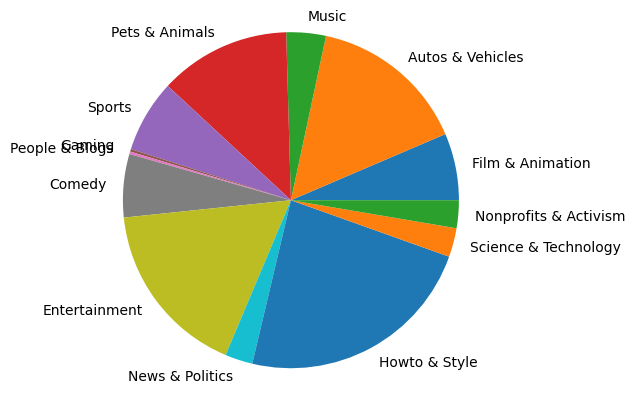

In [47]:
views_per_genre_df = views_per_genre_df.drop('Genre', axis=1)
likes_per_genre_df = likes_per_genre_df.drop('Genre', axis=1)

likes_sum = {}
views_sum = {}
y = 0
for row in index_df["Genre"]:
    likes_sum[row] = []   
    views_sum[row] = []

for row in index_df["Genre"]:
    views_sum[(index_df["Genre"].iloc[y])].append(views_per_genre_df.iloc[y].sum(axis=0))
    likes_sum[(index_df["Genre"].iloc[y])].append(likes_per_genre_df.iloc[y].sum(axis=0))
    y = y + 1

vals = list(views_sum.values())
views_sum1 = [ x[0] for x in vals ]
labels = list(views_sum.keys())
# Plot
plt.pie(views_sum1, labels=labels)
plt.axis('equal')
plt.show()



In [53]:
views_per_genre_df = pd.DataFrame({"Genre":views.keys(),"Views0":views0,"Views1":views1,"Views2":views2,"Views3":views3,"Views4":views4})
likes_per_genre_df = pd.DataFrame({"Genre":views.keys(),"Likes0":likes0,"Likes1":likes1,"Likes2":likes2,"Likes3":likes3,"Likes4":likes4})
views_per_genre_df['Views0'] = views_per_genre_df['Views0'].astype(float)
views_per_genre_df['Views1'] = views_per_genre_df['Views1'].astype(float)
views_per_genre_df['Views2'] = views_per_genre_df['Views2'].astype(float)
views_per_genre_df['Views3'] = views_per_genre_df['Views3'].astype(float)
views_per_genre_df['Views4'] = views_per_genre_df['Views4'].astype(float)
likes_per_genre_df['Likes0'] = likes_per_genre_df['Likes0'].astype(float)
likes_per_genre_df['Likes1'] = likes_per_genre_df['Likes1'].astype(float)
likes_per_genre_df['Likes2'] = likes_per_genre_df['Likes2'].astype(float)
likes_per_genre_df['Likes3'] = likes_per_genre_df['Likes3'].astype(float)
likes_per_genre_df['Likes4'] = likes_per_genre_df['Likes4'].astype(float)
views_per_genre_df

,Genre,Views0,Views1,Views2,Views3,Views4
0,Film & Animation,4876381.0,7760050.0,12415536.0,11167441.0,9115862.0
1,Autos & Vehicles,25315073.0,44126748.0,18329156.0,13880948.0,5430283.0
2,Music,10398543.0,2765504.0,4570222.0,8651715.0,410092.0
3,Pets & Animals,22922075.0,14835420.0,25040159.0,6939913.0,19334087.0
4,Sports,24847070.0,5055798.0,11045349.0,4166232.0,4042254.0
5,Gaming,373557.0,387321.0,302729.0,203853.0,458609.0
6,People & Blogs,419402.0,807651.0,264401.0,178782.0,32929.0
7,Comedy,7760050.0,12415536.0,5650141.0,11167441.0,5870183.0
8,Entertainment,44909967.0,44126748.0,7760050.0,12415536.0,10497816.0
9,News & Politics,5231484.0,3041420.0,3958536.0,3723326.0,2750579.0


In [55]:
merged_data_df = views_per_genre_df.merge(likes_per_genre_df, how = "right", on = "Genre")
merged_data_df

,Genre,Views0,Views1,Views2,Views3,Views4,Likes0,Likes1,Likes2,Likes3,Likes4
0,Film & Animation,4876381.0,7760050.0,12415536.0,11167441.0,9115862.0,334768.0,429300.0,930512.0,846411.0,0.0
1,Autos & Vehicles,25315073.0,44126748.0,18329156.0,13880948.0,5430283.0,1257804.0,1860037.0,1350159.0,349221.0,342887.0
2,Music,10398543.0,2765504.0,4570222.0,8651715.0,410092.0,584971.0,130219.0,92334.0,256184.0,16948.0
3,Pets & Animals,22922075.0,14835420.0,25040159.0,6939913.0,19334087.0,830322.0,996122.0,1555503.0,404915.0,1043506.0
4,Sports,24847070.0,5055798.0,11045349.0,4166232.0,4042254.0,1211072.0,194721.0,534129.0,150863.0,172947.0
5,Gaming,373557.0,387321.0,302729.0,203853.0,458609.0,18923.0,17097.0,25719.0,17225.0,28415.0
6,People & Blogs,419402.0,807651.0,264401.0,178782.0,32929.0,16513.0,42724.0,15403.0,6938.0,8466.0
7,Comedy,7760050.0,12415536.0,5650141.0,11167441.0,5870183.0,429300.0,930512.0,182736.0,846411.0,408898.0
8,Entertainment,44909967.0,44126748.0,7760050.0,12415536.0,10497816.0,2680951.0,1860037.0,429300.0,930512.0,505381.0
9,News & Politics,5231484.0,3041420.0,3958536.0,3723326.0,2750579.0,446963.0,148969.0,236277.0,183238.0,127588.0


In [57]:
merged_data_df['Total_Views'] = merged_data_df.filter(like='Views').sum(axis=1)
merged_data_df['Total_Likes'] = merged_data_df.filter(like='Likes').sum(axis=1)


In [61]:
merged_data_df['view_to_like_ratio'] = merged_data_df['Total_Likes'] / merged_data_df['Total_Views']

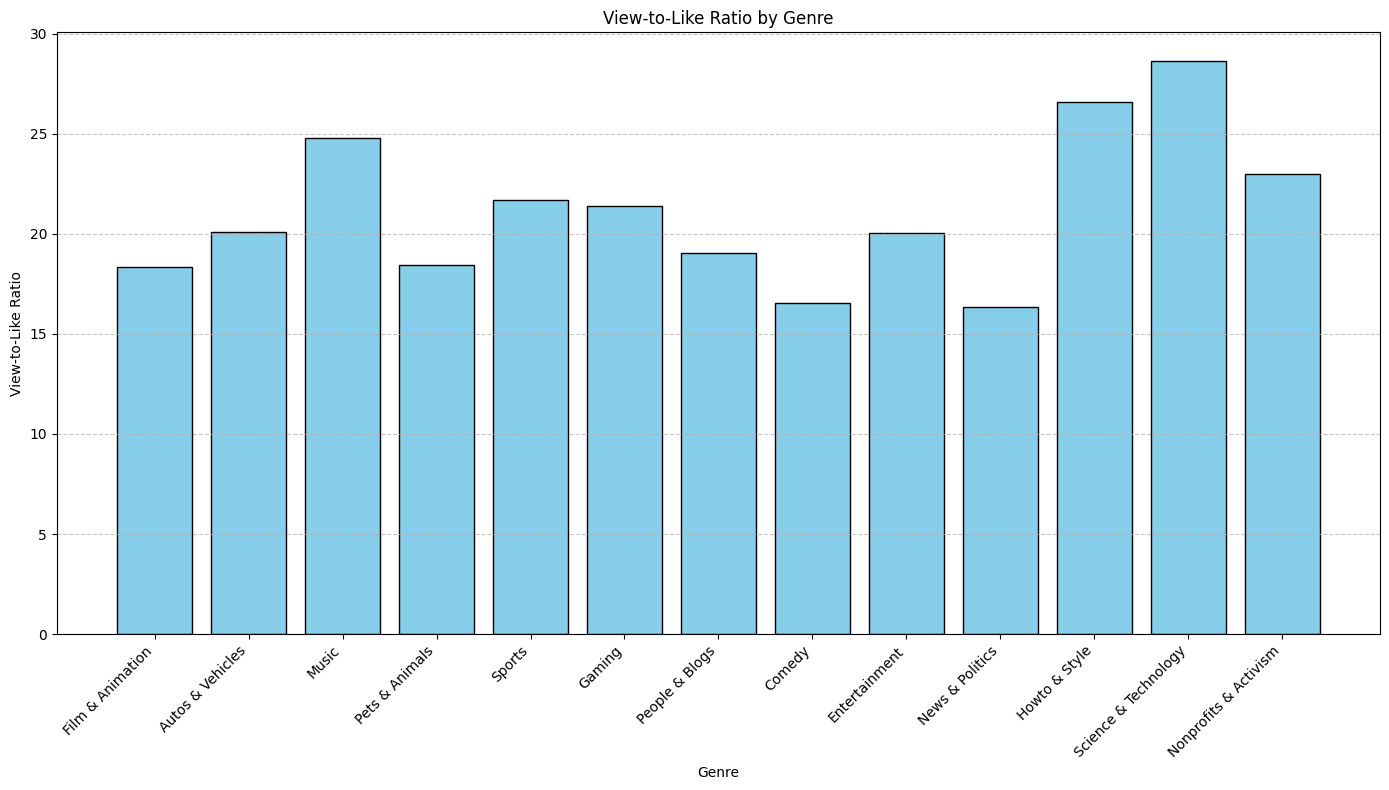

In [71]:
plt.figure(figsize=(14, 8))
plt.bar(df['Genre'], df['View_to_Like_Ratio'], color='skyblue', edgecolor='black')
plt.title('View-to-Like Ratio by Genre')
plt.xlabel('Genre')
plt.ylabel('View-to-Like Ratio')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()